## Assignment 1

### Q1

1.(40%) Discuss whether or not each of the following activities is a data mining
task.

- a) Extracting the frequencies of a microwave wave.

No, it's not. 

To extract the frequencies of a microware wave, just do a fast fourier transform (FFT) with time-domain wave form samples and we could get the frequency-domain spectrum samples, while data mining is more like an act of searching for structural patterns. Thus, it should be categorized as data preprocessing, the procedure before actual data mining when we get to use the extracted frequencies as features to do wave classification or other similar tasks.

- b) Divide the customers of a company according to their profitability.

Yes, it is. 

Customer segmentation would be a typical data mining problem. Unlike part (a), there's no specific equation engineered to calculate the exact outcome. As I see it, 'Divide the customers' could also refers to different data mining task in this context:

- It could be a supervised learning task, as classification. With this task, depending on exactly what parameters related to the client's profitability are available, based on which we could do some feature engineering, PCA, LDA, etc. to engineer a few features, then run it through a classifier like KNN, Decision Tree, or ensemble models like RandomForest and XGBoost. 

- It could be a unsupervised learning task, as clustering. Instead of utilizing the extracted features to output a class label, clustering also provides decent results for customer segmentation by vectorizing features of each individual and calculate the distance (eulcidean, mahanttan, minkowski, ...) and categorize the nearest ones as a cluster. Methods like KMeans or GMM Clustering using EM could probably do a good job.

- c) Monitoring seismic waves for earthquake activities.

Yes it is.

Here if monitoring the seismic waves involves not only collecting, cleaning, transforming of the waves but also to extract certain pattern in its frequency or other important predictive markers to calculate the possibility of earthquake then certainly it's considered as a data mining task, likely to be a binary classification to be exact, possible method for this would be KNN, Logistic Regression, SVM, etc.

- d) Predict the future stock price of a company according to their historical
records.

Yes, it is.

For sequential data in time series, forecasting the future number based on the historical record would be a typical regression task. The most recent input usually indicates the most relevant association with the future data that's to be predicted, so by shifting the input array we might transform the sequential stock price data to a supervised learning task which could be solved using regression models in machine learning or statistics. Or with sequential data, RNN and LSTM might provide better predictions with reasonable assigned hyperparameters.

 - e) Compute the total sales of a company in the last year.

No, it's not. 

Unlike the task in part d), simply computing the total sales of a company in one year is not a data mining task, there's no implicit pattern extracting required in the process. It is a basic addition task.

### Q2

2. (30%) Data mining tasks are generally divided into two major categories, i.e.,
predictive and descriptive tasks. Are the following tasks predictive or descriptive?
Please explain.

- a) Regression.

Regression is a predictive (supervised) task. 

A predictive task is basically to use or train a model to forecast unknown data points based on mining hidden patterns from historical data as training set, and regression approaches like linear, polynomial, lasso, ridge regression all predict the unknowns by fitting models of coefficients (weight, biase, regularization terms) to minimize loss function (OLS, MSE, etc.).

- b) Association Analysis.

Association Analysis is a descriptive task.

What a descriptive task normally do is to explain the general characteristics of data. Association analyses mine the hidden correlations between data items based on their joint appearance in certain context, like the famous diapers and beer example applied in the retailing industry, which uses the apriori algorithm. Also there are others like the FP_growth with data structure like the fr-tree to store the frequent appearing item sets.

- c) Clustering.

Clustering is a descriptive task.

By organizing the already available data points and  categorizing them into different segmented clusters in which all items share certain features so they are closer to each other, the process of clustering does not involve any predicting and forecasting. It is most like the preprocessing part in the whole data mining pipeline since usually it is followed by a classification task, such as to label a new data point based on the majority vote of the items in the cluster where it belongs. Frequently used methods are KMeans, dbscan, GMM with EM, etc. 

### Q3

3. (30%) Please define and give one example of its applications for the following
data mining tasks.

#### a) Classification

Classification is a typical data mining task (most algorithms represented in machine learning) that construct mainly non-parametric models to label a data point given its feature set. The output of classification varies as well, there's binary classification with results being 0 or 1 (True or False); and there's multi-class one with results being labels of training dataset, such as 10 classes in digits classification, object classification in images, facial recognition. Frequently used classifying algorithms include KNN, DecisionTree, SVM, RandomForest, also there's CNN in the deep learning context. 

----
__Example: KNN__

In [219]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


class KNN():
    def __init__(self, k=5):
        self.k = k

    def _vote(self, neighbor_labels):
        counts = np.bincount(neighbor_labels.astype('int'))
        return counts.argmax()
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1 - x2), axis=0))

    def predict(self, X_test, X_train, y_train):
        y_pred = np.empty(X_test.shape[0])
        for i, test_sample in enumerate(X_test):
            idx = np.argsort([self.euclidean_distance(test_sample, x) for x in X_train])[:self.k]
            k_nearest_neighbors = np.array([y_train[i] for i in idx])
            y_pred[i] = self._vote(k_nearest_neighbors)

        return y_pred



def main():
    data = datasets.load_iris()
    X = normalize(data.data)
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    clf = KNN(k=2)
    y_pred = clf.predict(X_test, X_train, y_train)

    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=y_pred, cmap='viridis')
    ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=y_test, cmap='rainbow')
    plt.show()

Accuracy: 0.92


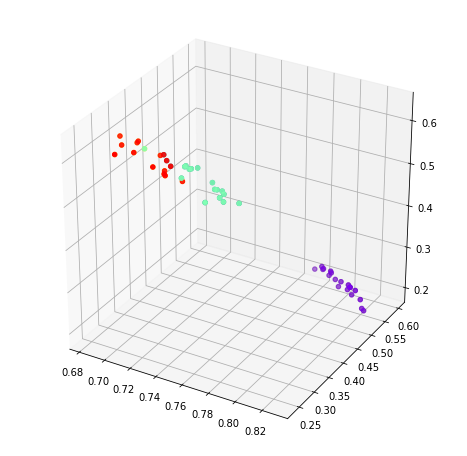

In [220]:
main()

#### b) Regression

Regression is a predictive data mining task, construct mainly parametric models with independent variables (x) to predict the dependent variables (y) or called responses sometime in statistics.
What it implies in the regression model is that it reflects the changes incurred in responses when one or some of the independent variables change, thus providing an approach for making conditional expectations of the response based on the given input.

----
__Example: Linear Regression__

In [232]:
class LinearRegression(object):
    def __init__(self, iterations=100, learning_rate=0.001):
        self.iterations = iterations
        self.learning_rate = learning_rate
    
    def initialize_weights(self, n_features):
        limit = 1 / np.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, ))
    
    def fit(self, X, y):
        [np.insert(i, 0, 1) for i in X]
        self.initialize_weights(n_features=X.shape[1])

        for i in range(self.iterations):
            y_pred = X.dot(self.w)
            grad_w = -(y - y_pred).dot(X)
            self.w -= self.learning_rate * grad_w
            
    def predict(self, X):
        [np.insert(i, 0, 1) for i in X]
        y_pred = X.dot(self.w)
        return y_pred

def main():
    X, y = datasets.make_regression(n_samples=100, n_features=1, noise=30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr = LinearRegression(iterations=100)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    mse = np.mean(0.5 * (y_test - y_pred)**2) 
    print("Mean squared error: %s" % (mse))
    
    plt.figure(figsize=(8,8))
    training = plt.scatter(X_train, y_train)
    testing = plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred)
    plt.legend((training, testing), ("Training", "Testing"), loc='upper left')
    plt.show()

Mean squared error: 478.3359099579678


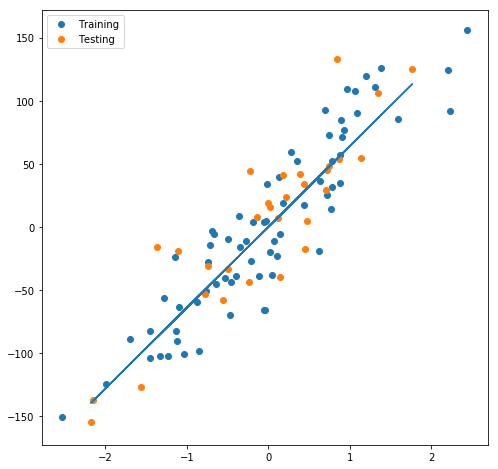

In [233]:
main()

- c) Clustering

Clustering is a data mining task that categorize data points into subsets in which members all share similar features, most likely the spatial distance like the euclidean, manhattan, etc. Although it seems like a procedure involving classifying data points into different clusters, unlike classification, clustering does not assign a specific label for each subset, hence it is considered as a unsupervised learning task.
 
----
__Example: KMeans__

In [236]:
import numpy as np

class KMeans(object):
    def __init__(self, k=2, max_iterations=500):
        self.k = k
        self.max_iterations = max_iterations
        
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1 - x2), axis=0))

    def init_random_centroids(self, X):
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            # randomly select k centroids
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    def closest_to_which_centroid(self, sample, centroids):
        # assert centroids.shape[0] == self.k
        closest_i = 0
        closest_dist = float('inf')
        for i, centroid in enumerate(centroids):
            dist = self.euclidean_distance(sample, centroid)
            if dist < closest_dist:
                closest_i = i
                closest_dist = dist
        return closest_i

    def clusterize(self, centroids, X):
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self.closest_to_which_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    def update_centroids(self, clusters, X):
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    def get_cluster_labels(self, clusters, X):
        y_pred = np.zeros(X.shape[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    def predict(self, X):
        centroids = self.init_random_centroids(X)
        for _ in range(self.max_iterations):
            clusters = self.clusterize(centroids, X)
            prev_centroids = centroids
            centroids = self.update_centroids(clusters, X)
            diff = centroids - prev_centroids
            if not diff.any():
                break
            return self.get_cluster_labels(clusters, X)
        
def main():
    X, y = datasets.make_blobs(n_features=2)
    print(X.shape, y.shape)
    clf = KMeans(k=4)
    y_pred = clf.predict(X)
    plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

(100, 2) (100,)


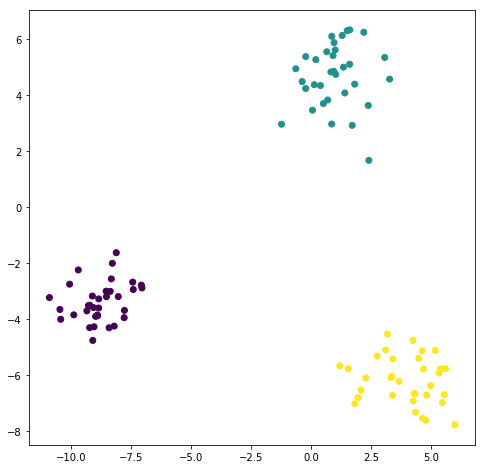

In [237]:
main()